# Distribuzioni di probabilità di variabili continue

Le definizioni che seguono sono adeguate ad una qualsiasi definizione di probabilità, purché soddisfi gli assioni di Kolmogorov. Quindi: probabilità frequentista e Bayesiana.

Dato un intervallo di valori possibili $\Omega$ per una variabile casuale continua $x$, definiamo la densità di probabilità $f(x)$ come misura della probabilità di un intedballo $\mathrm{d}x$:

$\displaystyle P([x, x+\mathrm{d}x[) = f(x)\mathrm{d}x$

e, equivalentemente:

$\displaystyle \frac{\mathrm{d}P(x)}{\mathrm{d}x} = f(x)$

Un qualsiasi intervallo $[a, b[$ avrà una probabilità data da:

$\displaystyle P([a, b[) = \int_a^b f(x)\,\mathrm{d}x$

Più in generale, dato un insieme $A$, che corrisponde all' *evento* $E$ in base a: $A = \{x\in\Omega: E\}$, la probabilità dell'evento $E$ si può scrivere come:

$\displaystyle P(E) = \int_E f(x)\,\mathrm{d}x$

La condizione di normalizzazione si scrive:

$\displaystyle \int_\Omega f(x)\,\mathrm{d}x = 1$

Spesso si usa l'acronimo **PDF** (*Probability Density Function*).

# Esempio con una distribuzione specifica

Consideriamo ad esempio la distribuzione *gamma* definita per $x>0$ come:

$\displaystyle f(x;\kappa,\theta) = C\,x^{k-1}e^{-x/\theta}$

La condizione di normalizzazione determina il valore di $C$:

$\displaystyle f(x;\kappa,\theta) = \frac{x^{\kappa-1}e^{-x/\theta}}{\theta^\kappa\Gamma(\kappa)}$

Dove la funzione $\displaystyle \Gamma(\kappa) = \int_0^\infty x^{\kappa-1}e^{-x}\,\mathrm{d}x$ per $\kappa$ intero vale $\Gamma(\kappa) = (\kappa -1)!$.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gamma
from scipy.optimize import fmin

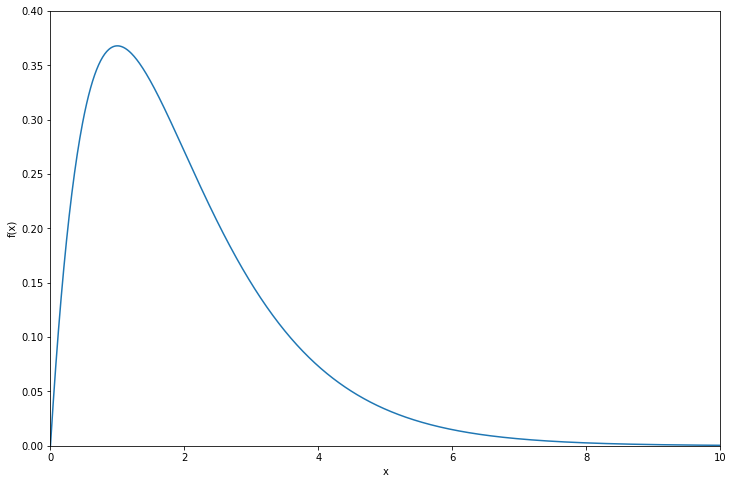

In [2]:
plt.figure(figsize=(12,8))
step = 0.01
x = np.arange(0, 10+step, step)
k = 2
y = gamma.pdf(x, k)
plt.plot(x,y)
plt.xlim(0, 10)
plt.ylim(0, 0.4)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

Non c'è una funzione per calcolare la moda della PDF. Si può però trovare il massimo di $f(x)$ con <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fmin.html">```scipy.optimize.fmin```</a> come minimo di $-f(x)$.

## Indicatori statistici per una distribuzione continua
Per una distribuzione continua possimo definire media, varianza e deviazione standard similmenta a come avevamo fatto per una distribuzione discreta:

$\displaystyle \mathbb{E}[x] = \int_{-\infty}^{+\infty} \!\!\!\!x f(x)\,\mathrm{d}x$

$\displaystyle \mathbb{E}[\varphi(x)] = \int_{-\infty}^{+\infty} \!\!\!\!\varphi(x) f(x)\,\mathrm{d}x$

$\displaystyle \mathbb{V}\mathrm{ar}[x] = \mathbb{E}[\mathbb{E}[x^2]-\mathbb{E}[x]^2] = \int_{-\infty}^{+\infty} \!\!\!\!(x-\mathbb{E}[x])^2 f(x)\,\mathrm{d}x$

$\displaystyle \sigma_x = \sqrt{\mathbb{V}\mathrm{ar}[x]}$

Similmente si possono definire la *skewness* e la *kurtosis*, ma qui non andiamo nei dettagli.

mean:  2.0
median:  1.6783469900166612
Optimization terminated successfully.
         Current function value: -0.367879
         Iterations: 25
         Function evaluations: 50
mode:  1.0000000000000009


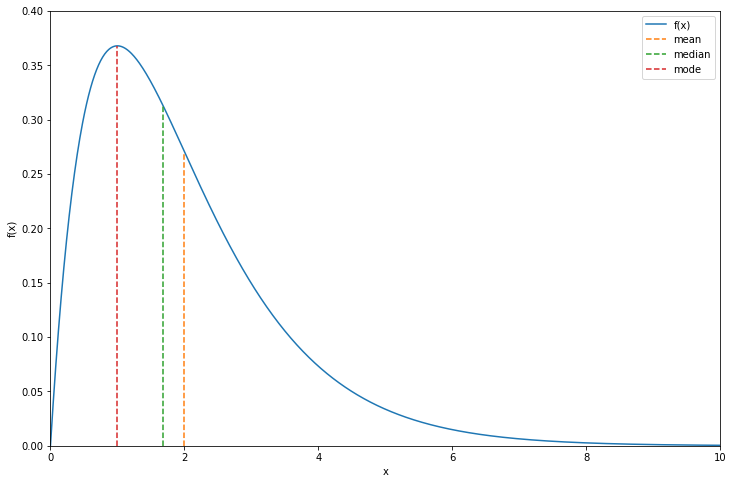

In [3]:
plt.figure(figsize=(12,8))
step = 0.01
x = np.arange(0, 10+step, step)
k = 2
y = gamma.pdf(x, k)
plt.plot(x,y, label='f(x)')
mean = gamma.mean(k)
print('mean: ', mean)
plt.plot([mean,mean], [0, gamma.pdf(mean, k)], label='mean', linestyle='--')
median = gamma.median(k)
print('median: ', median)
plt.plot([median,median], [0, gamma.pdf(median, k)], label='median', linestyle='--')
mode = fmin(lambda x: -gamma.pdf(x, k), 0)[0]
print('mode: ', mode)
plt.plot([mode,mode], [0, gamma.pdf(mode, k)], label='mode', linestyle='--')
plt.xlim(0, 10)
plt.ylim(0, 0.4)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

In [4]:
var = gamma.var(k)
std = gamma.std(k)
print('variance:', var)
print('std. dev.:', std)
mean, var, skew, kurt = gamma.stats(k, moments='mvsk')
print('skewness:', skew)
print('kurtosis:', kurt)

variance: 2.0
std. dev.: 1.4142135623730951
skewness: 1.414213562373095
kurtosis: 3.0


# Distribuzione cumulativa

È spesso comodo definire la distribuzione cumulativa di una PDF $f(x)$ come:

$\displaystyle F(x) = \int_{-\infty}^x f(x)\,\mathrm{d}x$

L'estremo inferiore di integrazione può essere limitato al valore minimo che può avere $x$.

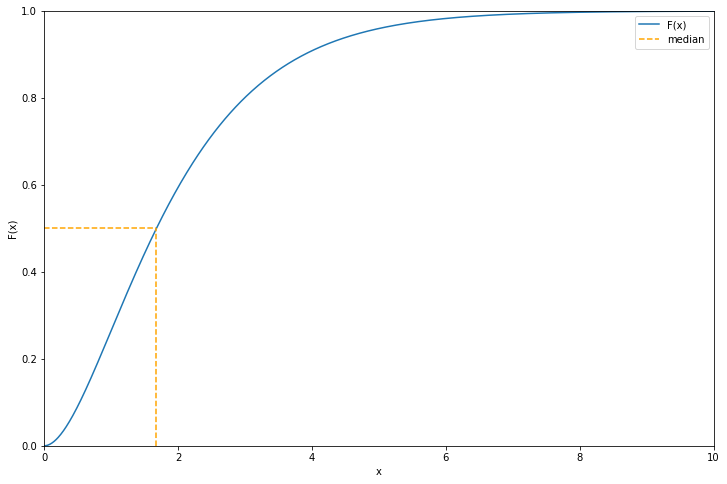

In [5]:
plt.figure(figsize=(12,8))
step = 0.01
k = 2
y = gamma.cdf(x, k)
plt.plot(x,y, label='F(x)')
plt.plot([median,median], [0, gamma.cdf(median, k)], color='orange', label='median', linestyle='--')
plt.plot([0,median], [0.5, 0.5], color='orange', linestyle='--')
plt.ylim(0, 1)
plt.xlim(0, 10)
plt.xlabel('x')
plt.ylabel('F(x)')
plt.legend()
plt.show()

In questo modo, la probabilità di un intervallo $[a, b[$ si può scrivere come:

$\displaystyle P([a,b[) = \int_a^b f(x)\,\mathrm{d}x = F(b) - F(a)$

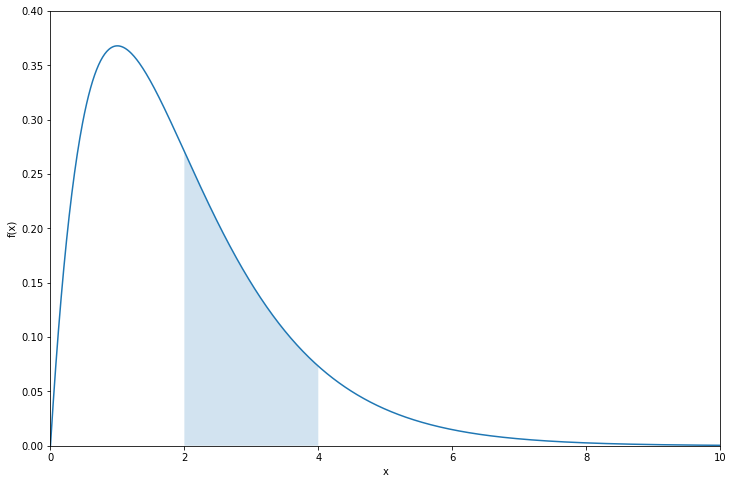

In [6]:
plt.figure(figsize=(12,8))
a,b = 2,4
x_ab = np.arange(a, b+step, step)
y_ab = gamma.pdf(x_ab, k)
plt.plot(x, gamma.pdf(x, k))
plt.fill_between(x_ab, y_ab, alpha=0.2)
plt.xlim(0, 10)
plt.ylim(0, 0.4)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

In [7]:
prob = gamma.cdf(b, k)-gamma.cdf(a, k)
print('P([{:.2f},{:.2f}[) = {:.2f}'.format(a,b,prob))

P([2.00,4.00[) = 0.31


# Quantili

Il problema di trovare i *quantili* di una distribuzione è in pratica l'inverso del calcolo della probabilità associata ad un intervallo.

Si definisce quantile ad un certo livello di probabilità $p$ il valore $x_p$ per il quale:

$\displaystyle P(x<x_p) = \int_{-\infty}^{x_p} \!\!\!f(x)\,\mathrm{d}x = F(x_p) = p$

Quando la probabilità $p$ è indicata come percentuale si parla anche di percentili.

Numericamente, bisogna invertire l'equazione:

$F(x_p) = p$ 

per ricavare $x_p$.

In [8]:
from scipy.optimize import fsolve
p = 0.1
def f_minus_p(x):
    return gamma.cdf(x, k)-p
root = fsolve(f_minus_p, 0.5)
x_p = root[0]
print("{:.2%} percentile: {:.2f}".format(p, x_p))

10.00% percentile: 0.53


In [9]:
print("F({:.2f}): {:.2}".format(x_p,gamma.cdf(x_p, k)))

F(0.53): 0.1


In [10]:
perc = np.arange(0.1, 1, 0.1)
x_perc = [fsolve(lambda x: gamma.cdf(x, k)-p, 0.5)[0] for p in perc]
x_perc

[0.5318116083896169,
 0.8243883090329824,
 1.0973492107034903,
 1.3764213420628875,
 1.678346990016661,
 2.022313245324642,
 2.439216483280204,
 2.9943083470021215,
 3.8897201698674286]

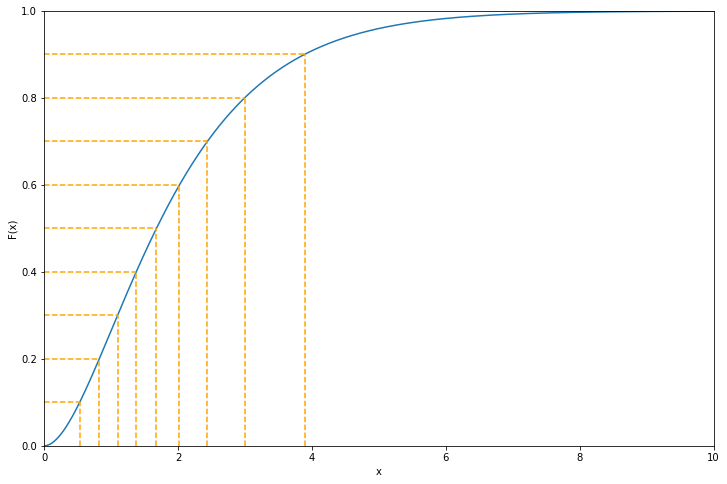

In [11]:
plt.figure(figsize=(12,8))
step = 0.01
k = 2
y = gamma.cdf(x, k)
plt.plot(x,y, label='F(x)')
for p, x_p in zip(perc, x_perc):
    plt.plot([x_p,x_p], [0, p], color='orange', linestyle='--')
    plt.plot([0,x_p], [p, p], color='orange', linestyle='--')
plt.ylim(0, 1)
plt.xlim(0, 10)
plt.xlabel('x')
plt.ylabel('F(x)')
plt.show()

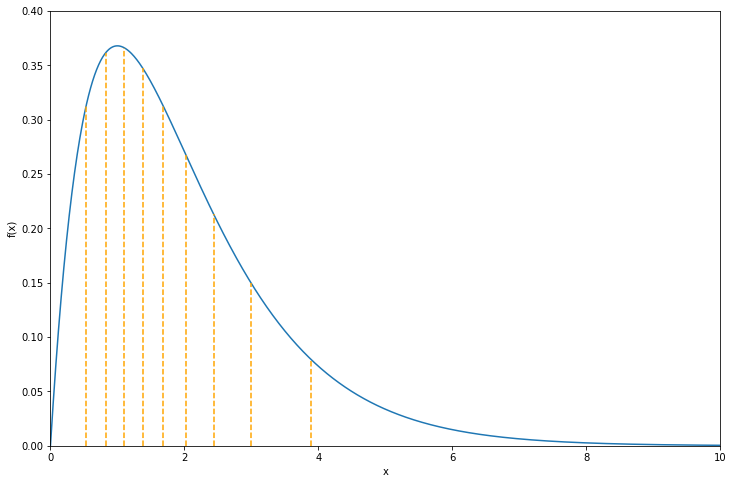

In [12]:
plt.figure(figsize=(12,8))
a,b = 2,4
x_ab = np.arange(a, b+step, step)
y_ab = gamma.pdf(x_ab, k)
plt.plot(x, gamma.pdf(x, k))
for p, x_p in zip(perc, x_perc):
    plt.plot([x_p,x_p], [0, gamma.pdf(x_p, k)], color='orange', label='{:.2%}'.format(p), linestyle='--')
plt.xlim(0, 10)
plt.ylim(0, 0.4)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

# La Delta di Dirac

Esiste un modo formale per descrivere distribuzioni di variabili discrete con lo stesso formalismo delle distribuzioni di probabilità continue.

Immaginiamo di avere una distribuzione che diventi sempre più stretta man mano che un parametro $\sigma$ si avvicina a zero. Un esempio è la distribuzione gaussiana.

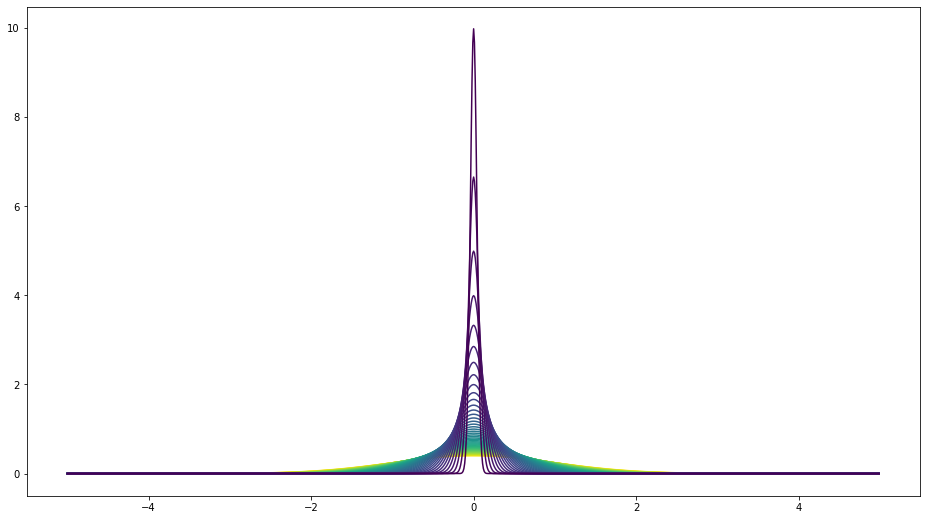

In [13]:
from scipy.stats import norm
plt.figure(figsize=(16,9))
x = np.arange(-5,5, 0.01)
sigma = np.arange(1, 0.02, -0.02)
colors = np.linspace(0, 1, len(sigma))
for s, c in zip(sigma, colors):
    plt.plot(x, norm.pdf(x, scale=s), color=plt.get_cmap('viridis')(1-c))
plt.show()

Man mano che $\sigma$ diventa più piccolo, la distribuzione diventa più stretta. Per preservare la normalizzazione (l'area sotto la curva deve essere uguale ad uno) la curva diventa sempre più alta.

Al limite per $\sigma\rightarrow 0$, possiamo immaginare che la distribuzione sia pari a zero ovunque tranne che nel punto $x=0$ in cui ha un valore infinito.

Definiamo questa distribuzione come $\delta(x)$, le cui proprietà sono:

$\delta(x)=0\,\,\forall x\ne 0$

$\displaystyle\int_{-\infty}^{+\infty}\!\!\!\!\!\!\delta(x)\,\mathrm{d}x = 0$

Possiamo traslare la $\delta$ in modo che sia centrata in un punto $x_0$:

$\delta(x-x_0)$

Risulterà quindi:

$\delta(x-x_0)=0\,\,\forall x\ne x_0$

$\displaystyle\int_{-\infty}^{+\infty}\!\!\!\!\!\!\delta(x-x_0)\,\mathrm{d}x = 0$


# Distribuzioni continue e delta di Dirac

Una distribuzione discreta può essere modellizzata nel continuo come somma di delta di Dirac. Ad esempio, la distribuzione del risultato del lancio di un dado può essere definita come:

$\displaystyle P(x) = \frac{1}{6}\sum_{k=1}^6 \delta(x-k)$

Risulta infatti:

$P(x) =0 \forall x \notin \{1, 2, 3, 4, 5, 6\}$

$\displaystyle\int_{-\infty}^{+\infty}\!\!\!\!\!\! P(x)\,\mathrm{d}x = \frac{1}{6}\cdot 6 = 1$


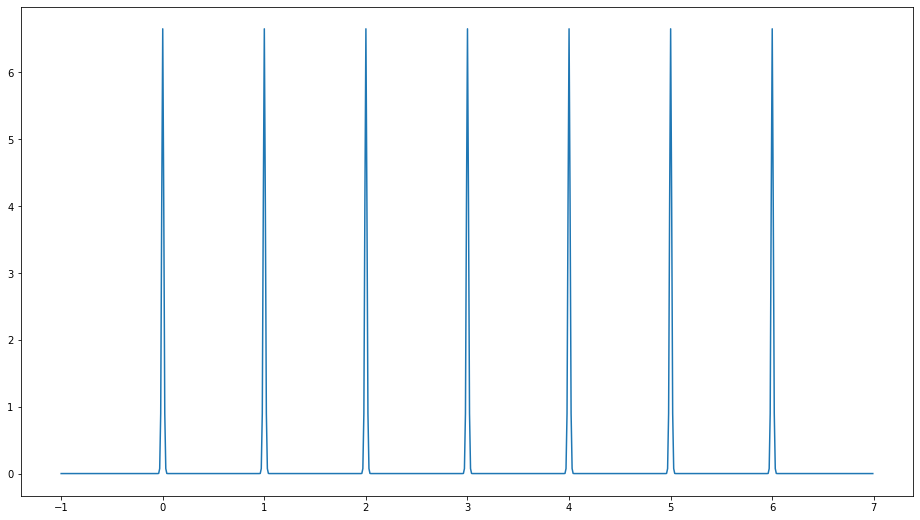

In [14]:
plt.figure(figsize=(16,9))
x = np.arange(-1,7, 0.01)
sigma=0.01
def pdf(x):
    p = 0
    for k in range(7):
        p += norm.pdf(x, scale=sigma, loc=k)
    p /= 6
    return p
plt.plot(x, pdf(x))
plt.show()

Nella pratica, i calcoli numerici fatti con approssimazioni di funzioni *impulsive* con picchi localizzati, come quella sopra, sono abbastanza difficili da trattare e meritano algoritmi ad hoc. È evidente perché: se calcolo la funzione, quasi ovunque è zero, e intorno al punto di interesse può avere valori molto alti che possono dare problemi numerici. Anche il campionamento della funzione richiederebbe di infittire i punti in un intorno molto piccolo del punto di interesse.

Le delta di Dirac possono essere trattate matematicamente nell'ambito della teoria delle distribuzioni, o funzioni generalizzate. Ma è argomento del corso di metodi matematici della fisica, per i nostri scopi ci accontenteremo di questa definizione pragmatica.

Una proprietà interessante della delta di Dirac è quando viene integrato il prodotto con un'altra funzione:

$\displaystyle\int_{-\infty}^{+\infty}\!\!\!\!\!\! f(x)\delta(x-y)\,\mathrm{d}x = f(y)$

Questa proprietà ricorda quella della delta di Kronecker:

$\displaystyle \sum_{i=1}^N f_i\delta_{ij} = f_j$

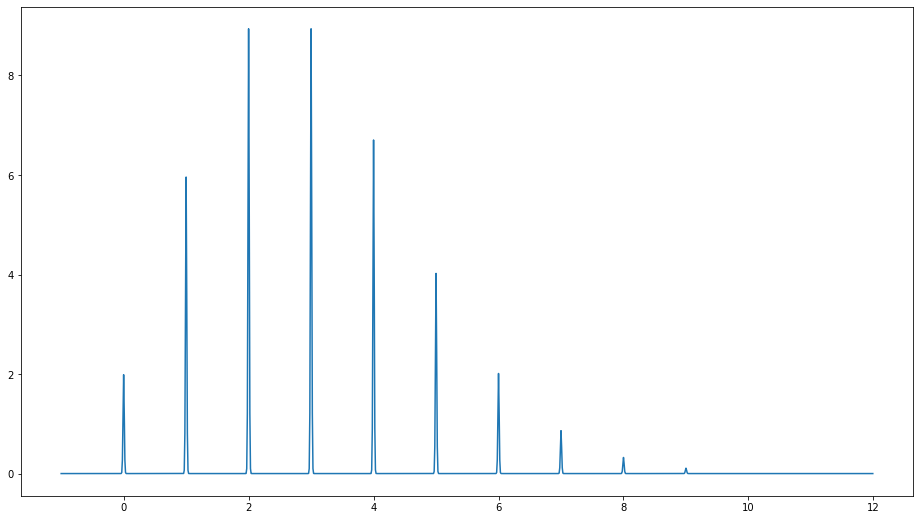

In [15]:
from scipy.stats import poisson

plt.figure(figsize=(16,9))
x = np.arange(-1,12, 0.01)
sigma=0.01
def pdf(x):
    p = 0
    for k in range(10):
        p += norm.pdf(x, scale=sigma, loc=k)*poisson.pmf(k, 3)
    return p
plt.plot(x, pdf(x))
plt.show()

# Alcune distribuzioni di probabilità notevoli

Nel seguito riporteremo alcune delle distribuzioni di probabilità tra le più usate.


## Distribuzione uniforme

La distribuzione unforme è caratterizzata da:
    
$\displaystyle u(x; a, b) = \left\{
\begin{array}{ccc}
\frac{\displaystyle 1}{\displaystyle b-a} & \mathrm{se} & a \le x \le b \\
0 & \mathrm{se} & x<a\,\,\mathrm{o}\,\,x> b
\end{array}
\right.$

Si dimostra che:

$\displaystyle\mathbb{E}(x)=\frac{a+b}{2}$

$\displaystyle\sigma_(x)=\frac{b-a}{\sqrt{12}}$

#### Esempio: 

Un rivelatore a strip riceve particelle distribuite uniformemente lungo ciascuna strip. Considerando tutte le particelle che cadono in una strip, la deviazione standard della distribuzione della posizione è data da $l\sqrt{12}$, dove $l$ è il passo delle strip. 

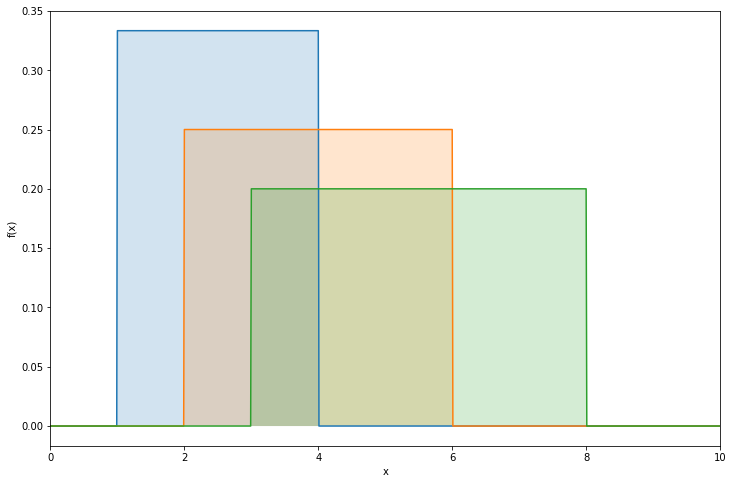

In [16]:
from scipy.stats import uniform
plt.figure(figsize=(12,8))
step = 0.01
xmin,xmax = 0,10
x = np.arange(xmin, xmax+step, step)
y = uniform.pdf(x, k)
for a, b in ((1, 4), (2, 6), (3, 8)):
    y = uniform.pdf(x, loc=a, scale=b-a)
    plt.fill_between(x, y, alpha=0.2,linewidth=2)
    plt.plot(x, y)
plt.xlim(0, 10)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

## Distribuzione esponenziale

$f(x;\lambda) = \lambda e^{-\lambda x}$

Si dimostra che:

$\mathbb{E}(x) = 1/\lambda$

$\sigma_x = 1/\lambda$

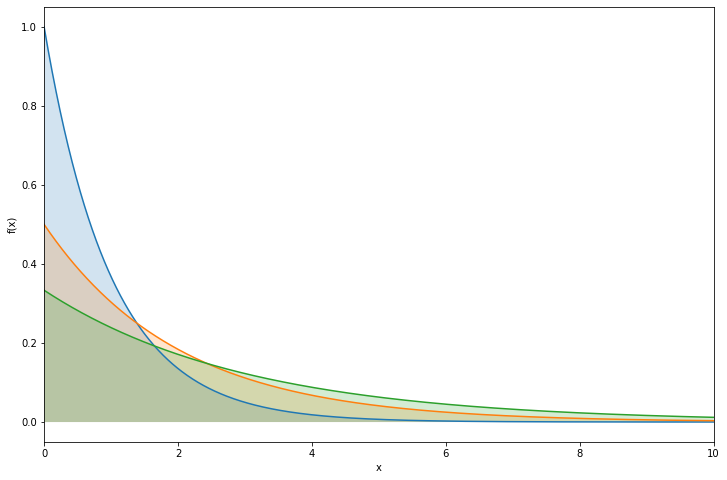

In [30]:
from scipy.stats import expon
plt.figure(figsize=(12,8))
step = 0.01
xmin,xmax = 0,10
x = np.arange(xmin, xmax+step, step)
y = uniform.pdf(x, k)
for lam in (1, 2, 3):
    y = expon.pdf(x, scale=lam)
    plt.fill_between(x, y, alpha=0.2,linewidth=2)
    plt.plot(x, y)
plt.xlim(0, 10)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

In [31]:
expon.mean()

1.0

In [32]:
expon.std()

1.0

In [33]:
mean, var, skew, kurt = expon.stats(moments='mvsk')
print(skew, kurt)

2.0 6.0


In [34]:
expon.median()

0.6931471805599453

## Distribuzione gaussiana o normale

$\displaystyle g(x; \mu, \sigma) = \frac{1}{\sqrt{2\pi\sigma^2}}\exp\left[-\frac{(x-\mu)^2}{2\sigma^2}\right]$

Nel caso $\mu=1$ e $\sigma=1$ si parla di normale standard:

$\displaystyle \phi(x) = \frac{1}{\sqrt{2\pi}}e^{-{x^2}/{2}}$

$\mu$ e $\sigma$ rappresentano il valor medio e la deviazione standard di $x$.

La distribuzione cumulativa è:

$\displaystyle \Phi(x) = \frac{1}{\sqrt{2\pi}}\int_{-\infty}^{x}e^{-x^{\prime 2}/2}\,\mathrm{d}x^\prime
=\frac{1}{2}\left[\mathrm{erf}\left(\frac{x}{\sqrt{2}}\right)+1\right]$

Hanno spesso applicazione le aree degli intervalli $[\mu-Z\sigma,\mu+Z\sigma]$, pari a:

$P(Z\sigma) =  \frac{1}{\sqrt{2\pi}}\int_{-Z\sigma}^{Z\sigma}e^{-x^{\prime 2}/2}\,\mathrm{d}x^\prime =
\Phi(Z)-\Phi(-Z) = \mathrm{erf}\left(\frac{Z}{\sqrt{2}}\right)$



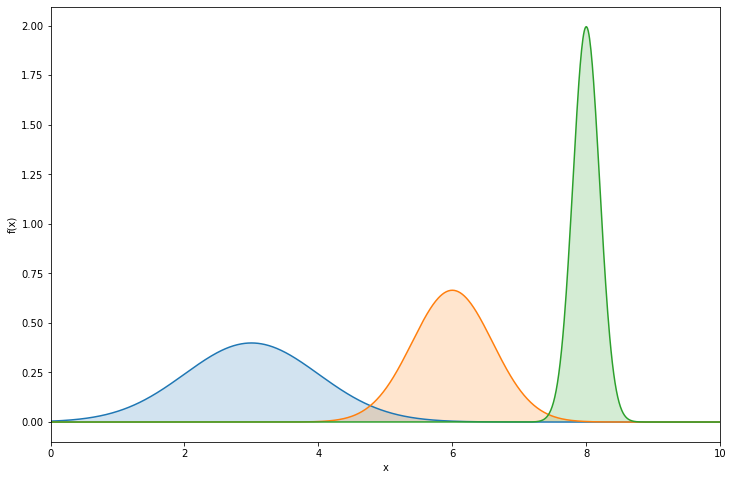

In [17]:
from scipy.stats import norm
plt.figure(figsize=(12,8))
step = 0.01
xmin,xmax = 0,10
x = np.arange(xmin, xmax+step, step)
y = uniform.pdf(x, k)
for mu,sigma in ((3, 1), (6, 0.6), (8, 0.2)):
    y = norm.pdf(x, loc=mu, scale=sigma)
    plt.fill_between(x, y, alpha=0.2,linewidth=2)
    plt.plot(x, y)
plt.xlim(0, 10)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

In [18]:
def n_sigma(z):
    return norm.cdf(z)-norm.cdf(-z)
for z in (1, 2, 3, 4, 5):
    print("P(Z sigma) = {:.6f}".format(n_sigma(z)))

P(Z sigma) = 0.682689
P(Z sigma) = 0.954500
P(Z sigma) = 0.997300
P(Z sigma) = 0.999937
P(Z sigma) = 0.999999


In [19]:
norm.mean()

0.0

In [20]:
norm.std()

1.0

In [21]:
mean, var, skew, kurt = norm.stats(moments='mvsk')
print(skew, kurt)

0.0 0.0


# Spunti per esercizi

* Definite una funzione di vostra scelta. Calcolate la relativa PDF normalizzandola e graficare. Determinare media, mediana, deviazione standard in modo numerico usando librerie di python. Se necessario, cercare la documentazione in rete. Mostrare sul grafico i valori di questi indicatori.
* Determinare la distribuzione della variabile $x = \mathrm{max(0, y)}$, dove $y$ è distribuita uniformemente nell'intervallo $[-1,1[$.
* Determinare la relazione tra deviazione standard $\sigma$ e *Full Width Half Maximum* (FWHM) per una distribuzione normale.